## Dependencias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

## Creación de datos sintéticos

In [2]:
X,y = make_blobs(100,2,centers=2,cluster_std=0.2)

### Conjunto de entrenamiento $S_n = \{(x^{(i)},y^{(i)}),i=1,\ldots,n\}$

In [3]:
Sn = pd.DataFrame(X,columns=['x1','x2'])
Sn['y'] = y

In [4]:
Sn.head()

,x1,x2,y
0,2.798429,-1.553178,0
1,2.738205,-1.125579,0
2,-7.385003,4.792291,1
3,2.561792,-1.439801,0
4,-7.618957,4.970845,1


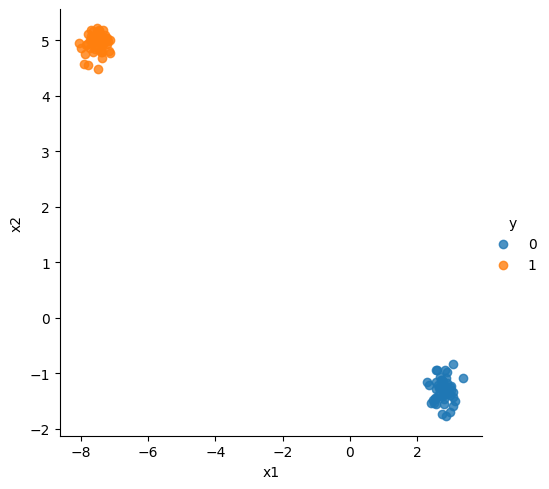

In [5]:
sns.lmplot(data=Sn,x='x1',y='x2',hue='y',fit_reg=False)

## Implementación de Pasivo-Agresivo

In [8]:
def PasivoAgresivo(Sn:pd.DataFrame,lmda,T:int):
    d = Sn.shape[1]-1
    n = Sn.shape[0]
    theta = np.zeros(d)
    for t in range(T):
        for i in range(n):
            x = Sn.loc[i].values[:d]
            y = Sn.loc[i].values[-1]
            loss = max(0,1-y*(np.sign(np.dot(theta,x))))
            eta = min(loss/(np.linalg.norm(x)**2),1/lmda)
            theta += eta*y*x
    return theta

In [9]:
theta=PasivoAgresivo(Sn,4,10)
theta

array([-0.09528505,  0.06183256])

## Ecuación del clasificador $\theta\cdot x$

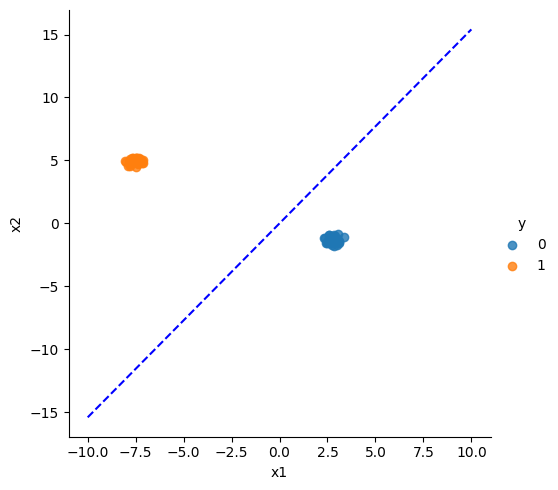

In [10]:
sns.lmplot(data=Sn,x='x1',y='x2',hue='y',fit_reg=False)
x1 = np.linspace(-10,10,100)
x2 = (-theta[0]*x1)/theta[1]
plt.plot(x1,x2,linestyle='--',color='blue')